### Agrupamiento 

### Segmentación del mercado 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#se aplican los estilos de seaborn 
sns.set()
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('Encuesta.csv')
data

,Satisfaccion,Lealtad
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Graficar los datos 
Crear una grafiva paar tener una vista previa de los datos 

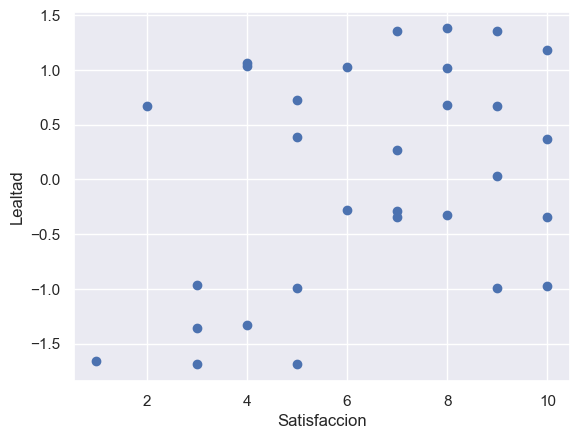

In [5]:
# tenemos 2 variables 
plt.scatter(data['Satisfaccion'], data['Lealtad'])
#Se nombran los ejes 
plt.xlabel('Satisfaccion')
plt.ylabel('Lealtad');

## Seleccionar las caracteristicas 

In [6]:
# creamos una copia de data y la guardamos en x
x = data.copy()

## Agrupamiento

In [7]:
# Creamos un objeto al que llamamos kmeans
#el numero en los parentesis es K, o el numero de clusters 

kmeans=KMeans(2)
#Adjustamos los datos con .fit 
kmeans.fit(x)


KMeans(n_clusters=2)

## Resultados de agrupamiento 

In [9]:
#creamos una copia de los datos de entrada 
grupos=x.copy()
#take note of the predicted clusters
grupos['grupos_pred']=kmeans.fit_predict(x)


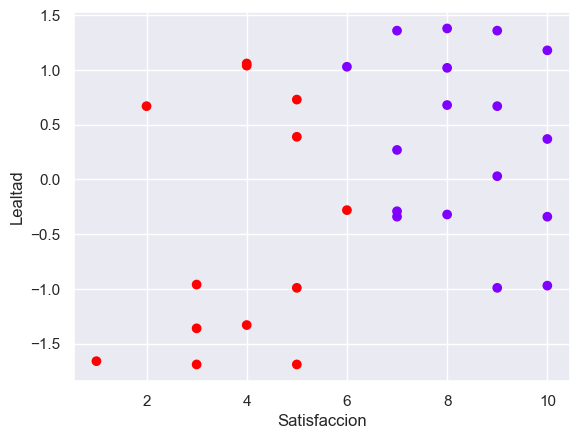

In [10]:
#Graficaremos los datos tomando como ejes la satisfacción y la lealtad 

plt.scatter(grupos['Satisfaccion'],grupos['Lealtad'], c=grupos['grupos_pred'], cmap='rainbow')
plt.xlabel('Satisfaccion')
plt.ylabel('Lealtad');



Probablemente el algoritmo SOLO consideró como característica la satisfacción.

La variable no fue estandarizada y los números de satisfacción son considerablemente más grandes.

Kmedias no consideró como variable la lealtad.


## Estandarizar las variables 
se van a estabilizar las variables y veremos los resultados 

In [35]:
#importar la libreria 
from sklearn import preprocessing
#escalar las entradas
#preprocessing, sacale  -> escala cada variable (columna en x )
#con relacion a si misma 
#the new results is an array 
x_escalada= preprocessing.scale(x)
x_escalada




array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Realizar método del codo

In [17]:
#creamos una lista vacia 
wcss=[]
#crear todas las posibles soluciones de agrupamiento co un ciclo
#se eligio una solucion de 1 a 9 grupos, esto puede variar 
for i in range (1, 10):
  #numero de clusters en variable (i)
    kmeans=KMeans(i)
    #adjustar los datos ESTANDARIZADOS 
    kmeans.fit(x_escalada)
    #abrir el wcss variable para la iteracion 
    wcss.append(kmeans.inertia_)
    
#ver resultados 
wcss

C:\Users\sauce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.363006425346784,
 4.449548936732537,
 3.8231980448085183]

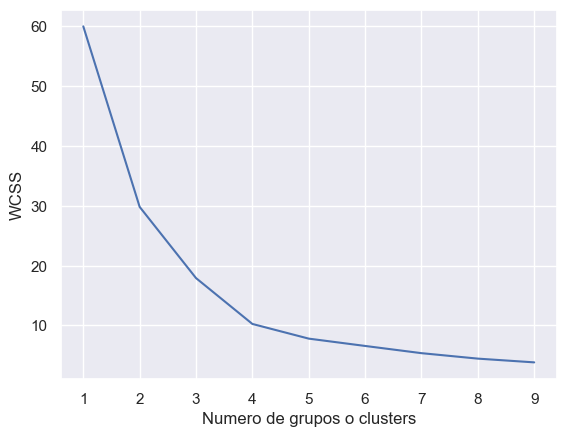

In [18]:
#graficar el numero de grupos o clusters vs WCSS
plt.plot(range(1,10),wcss)
plt.xlabel('Numero de grupos o clusters')
plt.ylabel('WCSS');

In [36]:
#numero de grupos 
kmeans_nuevo=KMeans(4)
kmeans_nuevo.fit(x_escalada)
#crear otra hoja de datos con los grupos o clusters predictivos 
grupos_nuevos= x.copy()
grupos_nuevos['grupos_pred']= kmeans_nuevo.fit_predict(x_escalada)

In [37]:
grupos_nuevos

,Satisfaccion,Lealtad,grupos_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


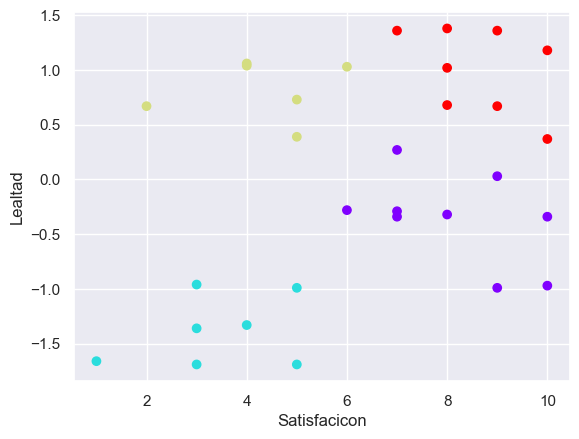

In [38]:
plt.scatter(grupos_nuevos['Satisfaccion'], grupos_nuevos['Lealtad'], c=grupos_nuevos['grupos_pred'], cmap='rainbow')
plt.xlabel('Satisfacicon')
plt.ylabel('Lealtad');